<a href="https://colab.research.google.com/github/BakerStreetPhantom/SimpleTradingStrategy/blob/main/Basic_Strat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
api_key = 'INSERT API KEY'
api_secret = 'INSERT API SECRET'

In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 921.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218925 sha256=31dc074bb76c0e4f9c99edffb675a79b7028bbd280a4c7de5965751303f1ee5a
  Stored in directory: /Users/sajidrizvi/Library/Caches/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas_ta
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import pandas_ta as ta

In [ ]:
from binance.client import Client
client = Client(api_key, api_secret)

In [ ]:
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1MINUTE, "1 Feb, 2023", "1 May, 2023")

In [ ]:
df = pd.DataFrame(klines)

In [ ]:
df.set_axis(['Open_Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time', 'Base_Asset_Volume', 'Number_of_Trades', 'Taker_Buy_Volume', 'Taker_Base_Asset_Volume', 'Ignore'], axis=1, inplace=True)

In [ ]:
df["Open"] = pd.to_numeric(df["Open"])
df["High"] = pd.to_numeric(df["High"])
df["Low"] = pd.to_numeric(df["Low"])
df["Close"] = pd.to_numeric(df["Close"])
df["Volume"] = pd.to_numeric(df["Volume"])

In [ ]:
fast_length = 12  # Fast length for MACD
slow_length = 26  # Slow length for MACD
signal_length = 9  # Signal length for MACD
std_dev = 2.5  # Standard deviation for Bollinger Bands
df.ta.macd(close = 'Close', fast_length=fast_length, slow_length=slow_length, signal_length=signal_length, append = True)
df.ta.bbands(close = 'Close', length=20, std=std_dev, append = True)

,BBL_20_2.5,BBM_20_2.5,BBU_20_2.5,BBB_20_2.5,BBP_20_2.5
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
128076,29255.581983,29358.7460,29461.910017,0.702782,0.204180
128077,29244.635164,29352.4310,29460.226836,0.734493,0.164314
128078,29230.599643,29345.0550,29459.510357,0.780066,0.123762
128079,29213.076969,29336.1575,29459.238031,0.839105,0.081788


In [ ]:
df.head(20)

,Open_Time,Open,High,Low,Close,Volume,Close_Time,Base_Asset_Volume,Number_of_Trades,Taker_Buy_Volume,Taker_Base_Asset_Volume,Ignore,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.5,BBM_20_2.5,BBU_20_2.5,BBB_20_2.5,BBP_20_2.5
0,1675209600000,23125.13,23140.47,23124.41,23133.74,199.09155,1675209659999,4605541.13923020,5638,105.58630000,2442612.58079880,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1675209660000,23133.74,23137.00,23123.15,23123.24,153.92866,1675209719999,3560361.91693670,4702,59.06593000,1366250.12852720,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1675209720000,23123.16,23145.99,23123.01,23142.98,204.22769,1675209779999,4725193.29931840,5254,115.59931000,2674641.06415890,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1675209780000,23144.00,23168.90,23141.75,23157.56,385.73800,1675209839999,8932482.08852220,7619,239.42415000,5544214.26780160,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1675209840000,23158.68,23159.26,23131.97,23133.11,209.27799,1675209899999,4844427.49608570,5393,84.59030000,1958234.40456110,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1675209900000,23133.11,23136.90,23086.73,23087.06,514.67716,1675209959999,11894314.04887010,9615,155.95481000,3604068.71086580,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1675209960000,23087.06,23112.84,23084.00,23101.51,425.65720,1675210019999,9830452.14225480,8561,200.43965000,4629319.13696920,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1675210020000,23100.03,23105.14,23086.08,23086.35,272.72273,1675210079999,6298786.48032170,5589,110.79302000,2559011.14155430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1675210080000,23086.35,23104.53,23084.35,23090.76,218.65485,1675210139999,5049621.35355420,5356,102.39917000,2364863.53051810,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1675210140000,23089.85,23091.31,23059.90,23067.90,558.62597,1675210199999,12888367.94202950,10673,271.74479000,6269378.11160820,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
portfolio = 1_000_000
active_trade = False
cur_pnl = []
position = 0

In [ ]:
def buy_trigger_update(i,active_trade,macd_cross_above,macd_cross_below):
    bb_cross = False
    if df['MACD_12_26_9'].iloc[i] > df['MACDs_12_26_9'].iloc[i] and df['MACD_12_26_9'].iloc[i-1] <= df['MACDs_12_26_9'].iloc[i-1]:
        macd_cross_below = True
        macd_cross_above = False
    if df['Close'].iloc[i] <= df['BBL_20_2.5'].iloc[i]:
        bb_cross = True
    if bb_cross == True and macd_cross_below == True and active_trade == False:
#         print("READY TO BUY")
        return True, macd_cross_above, macd_cross_below
    else:
        return False, macd_cross_above, macd_cross_below
def sell_trigger_update(i,active_trade,macd_cross_above,macd_cross_below):
    bb_cross = False
    if df['MACD_12_26_9'].iloc[i] < df['MACDs_12_26_9'].iloc[i] and df['MACD_12_26_9'].iloc[i-1] >= df['MACDs_12_26_9'].iloc[i-1]:
        macd_cross_above = True
        macd_cross_below = False
    if df['Close'].iloc[i] >= df['BBU_20_2.5'].iloc[i]:
        bb_cross = True
    if bb_cross and macd_cross_above and active_trade:
#         print("READY TO SELL")
        return True, macd_cross_above, macd_cross_below
    else:
        return False, macd_cross_above, macd_cross_below
    
def make_trade(i,active_trade,portfolio,position,macd_cross_above,macd_cross_below):
    trig, macd_cross_above, macd_cross_below = buy_trigger_update(i,active_trade,macd_cross_above,macd_cross_below)
    if trig == False:
        pass
    else:
        position = portfolio/df['Close'].iloc[i]
        portfolio = 0
        active_trade = True
        print("BOUGHT @ ", df['Close'].iloc[i])
    trig, macd_cross_above, macd_cross_below = sell_trigger_update(i,active_trade,macd_cross_above,macd_cross_below)
    if trig == False:
        pass
    else:
        portfolio = position*df['Close'].iloc[i]
        position = 0
        active_trade = False
        print("SOLD @ ", df['Close'].iloc[i])
        
    return active_trade, portfolio, position, macd_cross_above, macd_cross_below
    

In [ ]:
macd_cross_below = False
macd_cross_above = False
for i in range(50,len(df)):
    active_trade, portfolio, position, macd_cross_above, macd_cross_below = make_trade(i,active_trade,portfolio,position,macd_cross_above,macd_cross_below)
    cur_pnl.append(max(position*df['Close'].iloc[i],portfolio) - 1_000_000)
print(portfolio)
print(position,position*df['Close'].iloc[i])
    
    
    


BOUGHT @  23094.13
SOLD @  22868.32
BOUGHT @  22858.83
SOLD @  21706.72
BOUGHT @  21680.03
SOLD @  21810.5
BOUGHT @  21960.7
SOLD @  21782.51
BOUGHT @  21752.17
SOLD @  22527.14
BOUGHT @  24554.96
SOLD @  24785.6
BOUGHT @  24488.73
SOLD @  24030.39
BOUGHT @  24388.92
SOLD @  22386.9
BOUGHT @  22346.34
SOLD @  22413.8
BOUGHT @  22419.98
SOLD @  22220.77
BOUGHT @  22063.73
SOLD @  21252.03
BOUGHT @  24243.65
SOLD @  27335.48
BOUGHT @  27281.91
SOLD @  27932.58
BOUGHT @  28081.41
SOLD @  27323.4
BOUGHT @  27215.38
SOLD @  27324.25
BOUGHT @  28234.69
SOLD @  28479.44
BOUGHT @  28310.01
SOLD @  28222.21
BOUGHT @  28485.48
SOLD @  28019.99
BOUGHT @  27997.04
SOLD @  28049.99
BOUGHT @  28297.73
SOLD @  30186.56
BOUGHT @  30105.8
SOLD @  30844.99
BOUGHT @  30375.34
SOLD @  30411.8
BOUGHT @  30247.01
SOLD @  30541.07
BOUGHT @  30240.79
SOLD @  29419.43
BOUGHT @  30140.67
SOLD @  28935.31
BOUGHT @  28650.92
SOLD @  27630.9
BOUGHT @  27452.82
SOLD @  27471.37
BOUGHT @  27435.36
SOLD @  29910.56
B

In [ ]:
import matplotlib.pyplot as plt

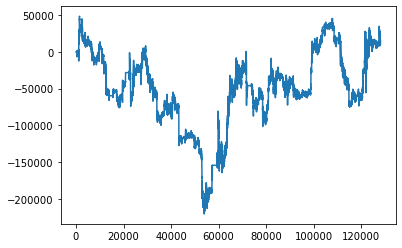

In [ ]:
plt.plot(cur_pnl)

In [ ]:
cur_pnl[-1] + 1000000

1010880.445569777